In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E-commerce Dataset.csv")

In [3]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [4]:
(df["Quantity"]>4).sum()

np.int64(8202)

In [5]:
df["Quantity"].sum()

np.float64(128373.0)

### 1. Descriptive Statistics

Calculate summary statistics for numeric columns (e.g., Sales, Quantity, Discount, Profit, Shipping_Cost).

Determine the mean, median, mode, and standard deviation for Sales and Profit.

In [6]:
df["Sales"].mean()

np.float64(152.34087231180175)

In [7]:
df["Sales"].median()

np.float64(133.0)

In [8]:
df["Sales"].mode()

0    228.0
Name: Sales, dtype: float64

In [9]:
df["Sales"].std()

np.float64(66.49541941735208)

Text(0, 0.5, 'Profit')

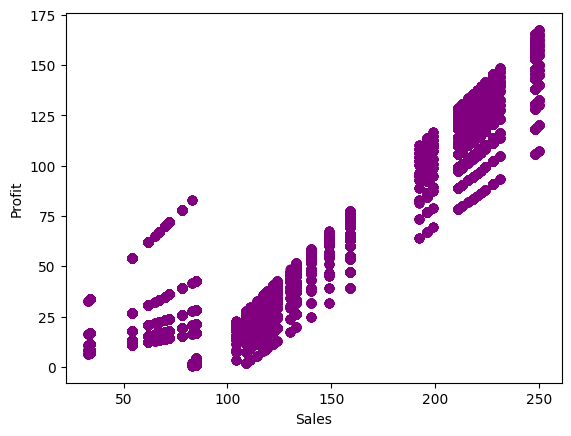

In [10]:
plt.scatter(df['Sales'], df['Profit'], color='purple')
plt.xlabel('Sales')
plt.ylabel('Profit')

### 2. Time-Based Analysis
-Analyze the sales trend over time (e.g., daily, weekly, monthly).
-Identify the peak sales period by analyzing Order_Date and Time.
-Find the average shipping cost per month.

In [11]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [12]:
###daily_koto_takar_order
df.groupby("Order_Date")["Sales"].sum().sort_values(ascending=False)

Order_Date
2018-04-24    94531.0
2018-07-30    72191.0
2018-06-30    49882.0
2018-04-25    43157.0
2018-05-16    43036.0
               ...   
2018-02-02     6693.0
2018-03-23     6684.0
2018-02-23     6119.0
2018-01-28     5296.0
2018-03-24     4184.0
Name: Sales, Length: 356, dtype: float64

In [13]:
###daily_koyta_order
df.groupby("Order_Date")["Sales"].count().sort_values(ascending=False)

Order_Date
2018-04-24    615
2018-07-30    482
2018-06-30    330
2018-05-16    282
2018-11-07    273
             ... 
2018-03-25     44
2018-02-23     41
2018-06-01     36
2018-01-28     34
2018-03-24     27
Name: Sales, Length: 356, dtype: int64

In [14]:
###sobcheye_boro_order
df.groupby("Order_Date")["Sales"].max()

Order_Date
2018-01-01    250.0
2018-01-02    250.0
2018-01-03    250.0
2018-01-04    250.0
2018-01-05    250.0
              ...  
2018-12-26    250.0
2018-12-27    250.0
2018-12-28    248.0
2018-12-29    250.0
2018-12-30    250.0
Name: Sales, Length: 356, dtype: float64

In [15]:
df["Order_Date"].describe()

count          51290
unique           356
top       2018-04-24
freq             615
Name: Order_Date, dtype: object

In [16]:
df.dtypes

Order_Date              object
Time                    object
Aging                  float64
Customer_Id              int64
Gender                  object
Device_Type             object
Customer_Login_type     object
Product_Category        object
Product                 object
Sales                  float64
Quantity               float64
Discount               float64
Profit                 float64
Shipping_Cost          float64
Order_Priority          object
Payment_method          object
dtype: object

In [17]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [18]:
weekly_sales = df.resample('W', on='Order_Date')['Sales'].sum()

In [19]:
weekly_sales

Order_Date
2018-01-07     92809.0
2018-01-14     91870.0
2018-01-21     83577.0
2018-01-28     76900.0
2018-02-04     75950.0
2018-02-11     70118.0
2018-02-18     93883.0
2018-02-25     81350.0
2018-03-04    126909.0
2018-03-11    124525.0
2018-03-18    104696.0
2018-03-25     60545.0
2018-04-01     72529.0
2018-04-08     79607.0
2018-04-15     93778.0
2018-04-22    111520.0
2018-04-29    283341.0
2018-05-06    194367.0
2018-05-13    218683.0
2018-05-20    213959.0
2018-05-27    138207.0
2018-06-03    121088.0
2018-06-10    137899.0
2018-06-17    158449.0
2018-06-24    155897.0
2018-07-01    169189.0
2018-07-08    156450.0
2018-07-15    156618.0
2018-07-22    204266.0
2018-07-29    201028.0
2018-08-05    187162.0
2018-08-12    167609.0
2018-08-19    158601.0
2018-08-26    169367.0
2018-09-02    103646.0
2018-09-09    172241.0
2018-09-16    157460.0
2018-09-23    178555.0
2018-09-30    180348.0
2018-10-07    178965.0
2018-10-14    193445.0
2018-10-21    160924.0
2018-10-28    167597.0


In [20]:
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M'))['Sales'].sum()
print(monthly_sales)


Order_Date
2018-01    379627.0
2018-02    332495.0
2018-03    435502.0
2018-04    597312.0
2018-05    824502.0
2018-06    642555.0
2018-07    810205.0
2018-08    664495.0
2018-09    738303.0
2018-10    743387.0
2018-11    877881.0
2018-12    767147.0
Freq: M, Name: Sales, dtype: float64


<Axes: xlabel='Order_Date'>

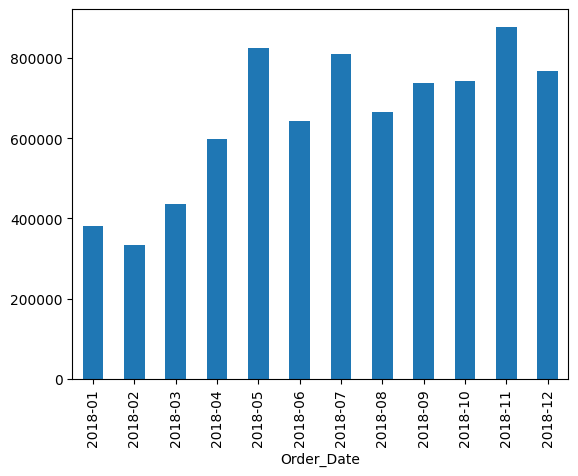

In [21]:
monthly_sales.plot(kind="bar")

### peak_sales_period


In [22]:
                                            ###MONTHLY

peak_month=monthly_sales.idxmax()

In [23]:
                                            ###Daily
daily_sales=df.groupby("Order_Date")["Sales"].sum()
peak_day=daily_sales.idxmax()

In [24]:
peak_day

Timestamp('2018-04-24 00:00:00')

In [25]:
                                            ###Weekly
peak_week=weekly_sales.idxmax()

In [26]:
peak_week

Timestamp('2018-04-29 00:00:00')

In [27]:
print("Peak Day:",peak_day,"Peak Week",peak_week,"Peak Month",peak_month)

Peak Day: 2018-04-24 00:00:00 Peak Week 2018-04-29 00:00:00 Peak Month 2018-11


In [28]:
df.dtypes

Order_Date             datetime64[ns]
Time                           object
Aging                         float64
Customer_Id                     int64
Gender                         object
Device_Type                    object
Customer_Login_type            object
Product_Category               object
Product                        object
Sales                         float64
Quantity                      float64
Discount                      float64
Profit                        float64
Shipping_Cost                 float64
Order_Priority                 object
Payment_method                 object
dtype: object

In [29]:
df['Time'] = pd.to_datetime(df['Time'],format='%H:%M:%S').dt.time

In [30]:
df["Time"].max()

datetime.time(23, 59, 58)

In [31]:
def categorize_time(row):
    if row >= pd.to_datetime('00:00:00').time() and row <= pd.to_datetime('11:59:59').time():
        return 'day'
    elif row >= pd.to_datetime('12:00:00').time() and row <= pd.to_datetime('17:59:59').time():
        return 'noon'
    elif row >= pd.to_datetime('18:00:00').time() and row <= pd.to_datetime('23:59:59').time():
        return 'night'
    else:
        return 'other'

In [32]:
df['Time_Category'] = df['Time'].apply(categorize_time)

Text(0.5, 1.0, 'Peak Time of the day')

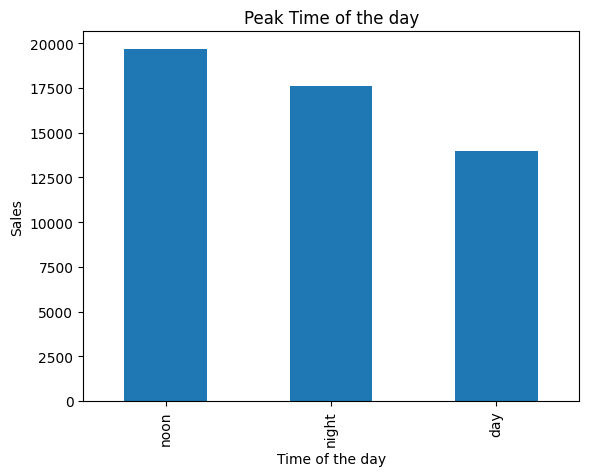

In [33]:
df["Time_Category"].value_counts().plot(kind="bar")
plt.xlabel('Time of the day')
plt.ylabel('Sales')
plt.title("Peak Time of the day")

In [34]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Time_Category
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,day
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,night
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,day
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,night
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,night


### Average Shipping Cost Per month

In [35]:
df["Shipping_Cost"].sum()

np.float64(361154.4)

In [36]:
df["Shipping_Cost"].sum()/12

np.float64(30096.2)

### Customer Login Type

In [37]:
df["Customer_Login_type"].value_counts()

Customer_Login_type
Member          49097
Guest            1993
First SignUp      173
New                27
Name: count, dtype: int64

In [38]:
df["Month"]=df['Order_Date'].dt.to_period('M')

In [39]:
monthly_login_counts = df.groupby('Month')['Customer_Login_type'].value_counts()

In [40]:
monthly_login_counts

Month    Customer_Login_type
2018-01  Member                 2412
         Guest                    98
         First SignUp              8
         New                       1
2018-02  Member                 2105
         Guest                    90
         First SignUp              8
         New                       3
2018-03  Member                 2776
         Guest                   110
         First SignUp             13
2018-04  Member                 3701
         Guest                   180
         First SignUp             14
         New                       1
2018-05  Member                 5176
         Guest                   215
         First SignUp             20
         New                       6
2018-06  Member                 3995
         Guest                   161
         First SignUp             20
         New                       3
2018-07  Member                 5105
         Guest                   198
         First SignUp             16
         

### AGE

In [41]:
def categorize_age(row):
    if row >= 5 and row <= 12:
        return 'Kids'
    elif row >= 13 and row <= 19:
        return 'Teen'
    elif row >= row >= 20 and row <= 40:
        return 'Young'
    elif row >= row >= 20 and row <= 40:
        return 'Old'
    else:
        return 'other'

In [42]:
df['Age_Category'] = df['Aging'].apply(categorize_age)

In [43]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Time_Category,Month,Age_Category
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,day,2018-01,Kids
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,night,2018-07,other
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,day,2018-11,Kids
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,night,2018-04,Kids
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,night,2018-08,Kids


In [44]:
df["Age_Category"].value_counts()

Age_Category
Kids     29115
other    22175
Name: count, dtype: int64

In [45]:
df["Aging"].value_counts()

Aging
1.0     7467
3.0     5017
5.0     4939
7.0     4900
6.0     4891
10.0    4890
4.0     4875
8.0     4820
2.0     4815
9.0     4674
10.5       1
Name: count, dtype: int64

<Axes: xlabel='Gender'>

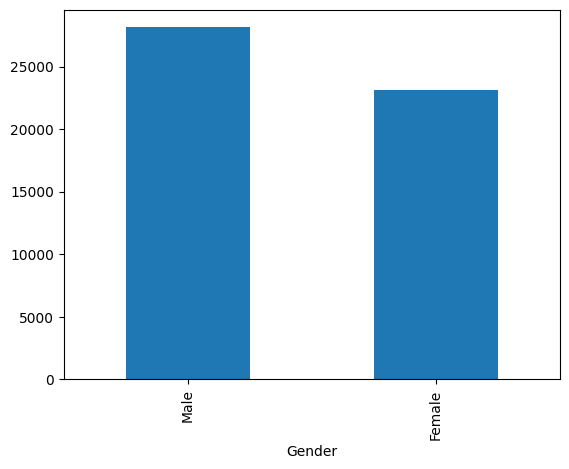

In [46]:
df["Gender"].value_counts().plot(kind="bar")

### Product Perfomance

Determine the top 5 product categories based on sales.

In [47]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Time_Category,Month,Age_Category
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,day,2018-01,Kids
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,night,2018-07,other
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,day,2018-11,Kids
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,night,2018-04,Kids
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,night,2018-08,Kids


<Axes: xlabel='Product_Category'>

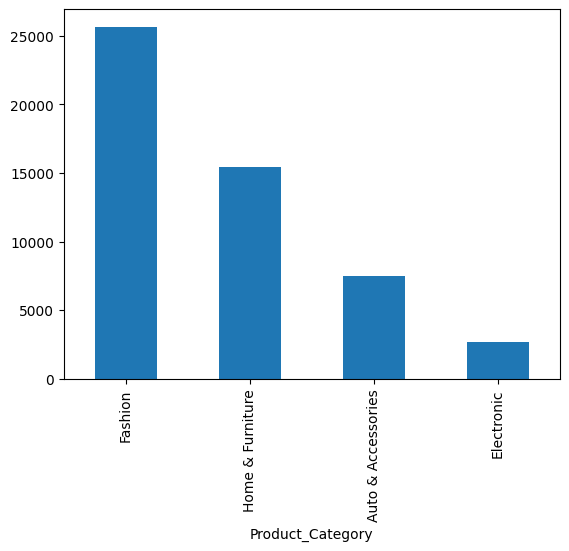

In [48]:
df["Product_Category"].value_counts().plot(kind="bar")

In [49]:
df["Product"].value_counts().sort_values(ascending=False)

Product
Shirts                    2332
Jeans                     2332
Fossil Watch              2332
T - Shirts                2332
Suits                     2332
Running Shoes             2331
Casula Shoes              2331
Sports Wear               2331
Formal Shoes              2331
Titak watch               2331
Sneakers                  2331
Dinner Crockery           1566
Dinning Tables            1542
Shoe Rack                 1542
Sofas                     1542
Umbrellas                 1542
Beds                      1542
Towels                    1541
Bed Sheets                1541
Curtains                  1541
Sofa Covers               1539
Tyre                       893
Car Pillow & Neck Rest     829
Car Seat Covers            827
Car Media Players          826
Car Speakers               826
Car Mat                    826
Car Body Covers            826
Car & Bike Care            826
Bike Tyres                 826
Speakers                   261
Mixer/Juicer               224


Find the most and least profitable products.

In [50]:
df.groupby("Product")["Profit"].sum().sort_values(ascending=False).head(5)

Product
T - Shirts       340720.6
Titak watch      296718.2
Running Shoes    289097.6
Jeans            276856.3
Formal Shoes     265350.7
Name: Profit, dtype: float64

In [51]:
df.groupby("Product")["Profit"].sum().sort_values(ascending=False).tail(5)

Product
LCD             6197.2
Mixer/Juicer    5033.3
Mouse           4632.8
Watch           3428.5
Keyboard        3292.4
Name: Profit, dtype: float64

Analyze the average discount given for each Product_Category

In [52]:
df.groupby("Product_Category")["Discount"].mean().sort_values(ascending=False)

Product_Category
Fashion               0.356036
Home & Furniture      0.285860
Auto & Accessories    0.214206
Electronic            0.159682
Name: Discount, dtype: float64

### Investigate the relationship between Discount and Profit.

In [53]:
df["Discount"].corr(df["Profit"])

np.float64(-0.0032041589438934702)

### Identify the products or categories where high discounts led to higher/lower profits.

In [55]:
df["Discount_Level"] = pd.qcut(df["Discount"], q=4, labels=["Low", "Medium", "High", "Very High"]) 

In [59]:
category_analysis = (
    df.groupby(["Product_Category", "Discount_Level"])["Profit"]
    .mean()
    .unstack()
)
print(category_analysis)


Discount_Level            Low     Medium       High  Very High
Product_Category                                              
Auto & Accessories  68.300494  59.003608        NaN        NaN
Electronic          64.491151        NaN        NaN        NaN
Fashion             87.441421  82.999834  79.313673  76.083148
Home & Furniture    61.442885  55.726309  52.360164  50.303098


C:\Users\ahamm\AppData\Local\Temp\ipykernel_10024\2558206484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Product_Category", "Discount_Level"])["Profit"]


In [58]:
high_discounts = df[df["Discount_Level"].isin(["High", "Very High"])]
result = high_discounts.groupby("Product_Category")["Profit"].mean().sort_values()
print(result)


Product_Category
Home & Furniture    51.838448
Fashion             77.594359
Name: Profit, dtype: float64


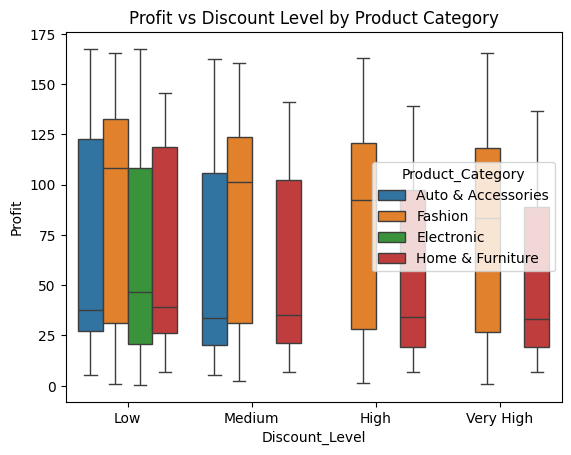

In [61]:
sns.boxplot(x="Discount_Level", y="Profit", hue="Product_Category", data=df)
plt.title("Profit vs Discount Level by Product Category")
plt.show()

### Device and Payment Insights

In [62]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Time_Category,Month,Age_Category,Discount_Level
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,day,2018-01,Kids,Medium
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,night,2018-07,other,Medium
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,day,2018-11,Kids,Low
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,night,2018-04,Kids,Medium
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,night,2018-08,Kids,Medium


In [63]:
df["Device_Type"].value_counts()

Device_Type
Web       47632
Mobile     3658
Name: count, dtype: int64

In [64]:
df["Payment_method"].value_counts()

Payment_method
credit_card    38137
money_order     9629
e_wallet        2789
debit_card       734
not_defined        1
Name: count, dtype: int64

In [65]:
df["Sales"].mean()

np.float64(152.34087231180175)

In [67]:
payment_frequency = df["Payment_method"].value_counts()
print(payment_frequency)

Payment_method
credit_card    38137
money_order     9629
e_wallet        2789
debit_card       734
not_defined        1
Name: count, dtype: int64


In [69]:
average_sales = df.groupby("Payment_method")["Sales"].mean().sort_values(ascending=False)
print(average_sales)


Payment_method
credit_card    152.595422
money_order    151.757088
e_wallet       151.577626
debit_card     149.835150
not_defined     34.000000
Name: Sales, dtype: float64


In [70]:
payment_analysis = df.groupby("Payment_method")["Sales"].agg(
    Frequency="count", Avg_Sales="mean"
).sort_values(by="Avg_Sales", ascending=False)
print(payment_analysis)


                Frequency   Avg_Sales
Payment_method                       
credit_card         38136  152.595422
money_order          9629  151.757088
e_wallet             2789  151.577626
debit_card            734  149.835150
not_defined             1   34.000000


### Shipping Cost Analysis

In [76]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,...,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Time_Category,Month,Age_Category,Discount_Level,Shipping_cost_Level
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,...,0.3,46.0,4.6,Medium,credit_card,day,2018-01,Kids,Medium,Medium
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,...,0.3,112.0,11.2,Medium,credit_card,night,2018-07,other,Medium,High
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,...,0.1,31.2,3.1,Critical,credit_card,day,2018-11,Kids,Low,Low
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,...,0.3,26.2,2.6,High,credit_card,night,2018-04,Kids,Medium,Low
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,...,0.3,160.0,16.0,Critical,credit_card,night,2018-08,Kids,Medium,High


In [74]:
##Average Shipping Cost per order
df["Shipping_Cost"].sum()/51290

np.float64(7.041419379996101)

In [75]:
df["Shipping_cost_Level"] = pd.qcut(df["Shipping_Cost"], q=3, labels=["Low", "Medium", "High"]) 

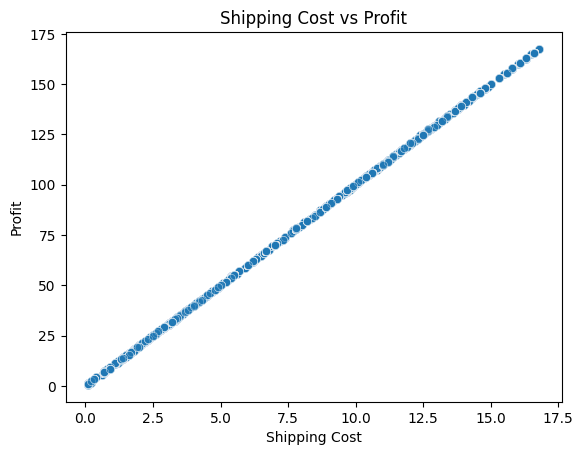

In [77]:
sns.scatterplot(x="Shipping_Cost", y="Profit", data=df, alpha=0.6)
plt.title("Shipping Cost vs Profit")
plt.xlabel("Shipping Cost")
plt.ylabel("Profit")
plt.show()

In [79]:
df.groupby("Shipping_cost_Level")["Order_Priority"].value_counts()

C:\Users\ahamm\AppData\Local\Temp\ipykernel_10024\4208978657.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Shipping_cost_Level")["Order_Priority"].value_counts()


Shipping_cost_Level  Order_Priority
Low                  Medium            10011
                     High               5324
                     Critical           1424
                     Low                 785
Medium               Medium             9931
                     High               4859
                     Critical           1146
                     Low                 879
High                 Medium             9491
                     High               5316
                     Critical           1361
                     Low                 760
Name: count, dtype: int64

### Customer Lifetime Value

In [80]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,...,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Time_Category,Month,Age_Category,Discount_Level,Shipping_cost_Level
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,...,0.3,46.0,4.6,Medium,credit_card,day,2018-01,Kids,Medium,Medium
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,...,0.3,112.0,11.2,Medium,credit_card,night,2018-07,other,Medium,High
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,...,0.1,31.2,3.1,Critical,credit_card,day,2018-11,Kids,Low,Low
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,...,0.3,26.2,2.6,High,credit_card,night,2018-04,Kids,Medium,Low
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,...,0.3,160.0,16.0,Critical,credit_card,night,2018-08,Kids,Medium,High


In [84]:
df.groupby("Customer_Id")["Sales"].sum().sort_values(ascending=False).head(10)

Customer_Id
87989    994.0
35324    949.0
79016    935.0
10436    929.0
51093    927.0
16997    925.0
80884    904.0
97843    903.0
95831    894.0
37805    890.0
Name: Sales, dtype: float64